<a href="https://colab.research.google.com/github/DEEPA1023/mini-project/blob/main/imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 171 µs (started: 2021-04-28 13:59:56 +00:00)


In [3]:
!pip install bing-image-downloader

time: 3.24 s (started: 2021-04-28 14:00:03 +00:00)


In [4]:
!mkdir images

time: 115 ms (started: 2021-04-28 14:00:10 +00:00)


In [5]:
from bing_image_downloader import downloader
downloader.download("single pumpkin", limit=30,output_dir='images',adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 13 Images on Page 1.


[%] Downloading Image #1 from https://www.cookingclassy.com/wp-content/uploads/2017/09/pumpkin-cookies-cream-cheese-frosting-20.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://easydessert.org/wp-content/uploads/2015/10/Chocolate-Cake.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://agentpalmer.com/wp-content/uploads/2014/10/All-Hallows-Eve.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://media1.popsugar-assets.com/files/thumbor/1Idppvs00DTf6nPp5CkLBFlvrEE/fit-in/2048xorig/filters:format_auto-!!-:strip_icc-!!-/2017/09/18/958/n/1922441/tmp_SksRPX_53f5723d949abc87_tumblr_ovdkbun9pk1tmqc45o7_540.gif
[%] File Downloaded !

[%] Downloading Image #5 from https://www.bing.com/th/id/OGC.49862cf8cef6c15b584e1f18bbd297f8?pid=1.7&amp;rurl=https%3a%2f%2fmedia1.popsugar-assets.com%2ffiles%2fthumbor%2f1Idppvs00DTf6nPp5CkLBFlvrEE%2ffit-in%2f2048xorig%2ffilters%3aformat_auto-!!-%3astrip_icc-!!-%2f

In [6]:
downloader.download("laptops", limit=30,output_dir='images',adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from https://www.hdwallpapers.in/download/moraine_lake_canada_4k-1680x1050.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.hdwallpapers.in/download/autumn_red_forest-1920x1200.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.hdwallpapers.in/download/eiffel_tower_paris_france-1680x1050.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.hdwallpapers.in/download/paris_eiffel_tower-1920x1080.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.hdwallpapers.in/download/forest_under_moon_sky_hd_dark_aesthetic-1366x768.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.hdwallpapers.in/download/brown_squirrel_is_standing_on_tree_trunk_eating_nuts_hd_animals-1280x720.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.hdwallpapers.in/download/exodus_gods_and_kings_movie-1920x1080.jpg
[%] File Downloaded 

In [7]:
downloader.download("simple ceiling fan", limit=30,output_dir='images',adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/736x/db/6a/79/db6a79068e31d4529e150a4e62119f22--ceiling-design.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.tiltoncofferedceilings.com/wp-content/uploads/2014/08/Image-2.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/04/d7/a7/04d7a7c815eb974741bc56ff37a5a9de.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://i.ytimg.com/vi/ITXqFe_aG1I/hqdefault.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://warisanlighting.com/wp-content/uploads/parser/ceiling-fan-for-high-ceiling-7.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.doityourself.com/forum/attachments/lighting-light-fixtures-ceiling-exhaust-fans/1684d1341771956-looking-ceiling-fan-options-img_metal_raceway.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.doityourself.com/forum/attachments/electric

In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['laptops','single pumpkin','simple ceiling fan']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images) 

time: 21.9 s (started: 2021-04-28 14:01:09 +00:00)


<BarContainer object of 3 artists>

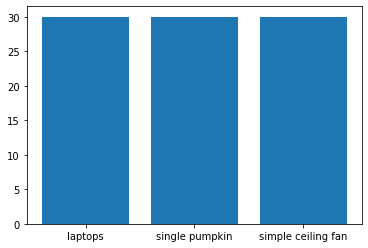

time: 188 ms (started: 2021-04-28 14:01:36 +00:00)


In [9]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)


time: 22.3 ms (started: 2021-04-28 14:02:00 +00:00)


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['linear']},                            
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 36s (started: 2021-04-28 14:02:16 +00:00)


In [12]:
y_pred = clf.predict(x_test)
y_pred

array([1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2,
       2, 0, 2, 0, 1])

time: 152 ms (started: 2021-04-28 14:03:56 +00:00)


In [13]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 6.55 ms (started: 2021-04-28 14:04:03 +00:00)


In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 954 µs (started: 2021-04-28 14:04:07 +00:00)


In [15]:
accuracy_score(y_pred,y_test)

0.7777777777777778

time: 8.38 ms (started: 2021-04-28 14:04:12 +00:00)


In [16]:
confusion_matrix(y_pred,y_test)

array([[5, 0, 0],
       [1, 8, 0],
       [2, 3, 8]])

time: 6.25 ms (started: 2021-04-28 14:04:19 +00:00)


In [17]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 33.8 ms (started: 2021-04-28 14:04:24 +00:00)


In [18]:
model = pickle.load(open('img_model.p','rb'))

time: 23.6 ms (started: 2021-04-28 14:04:26 +00:00)


Enter your URLhttps://cdn.neow.in/news/images/uploaded/2019/07/1562628733_portege_x30-f_02_win10.jpg
(3449, 6132, 3)


TypeError: ignored

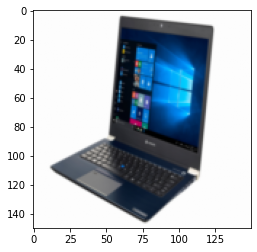

time: 1min 8s (started: 2021-04-28 14:06:21 +00:00)


In [20]:
flat_data = []
url = input('Enter your URL')
img = imread(url) 
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = (model.predict(flat_data))
y_out = CATEGORIES(y_out[0])
print(f'PREDICTED OUTPUT: {y_out}')